In [ ]:
from google.colab import drive

# Mounting Google Drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [ ]:
# Listing the files inside the Google Drive directory (Use your own directory)
!ls "/content/gdrive/MyDrive/Fall2023/CS464 - ML/Project/dataset"

test  train


In [ ]:
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt
import string
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd

In [ ]:
img_size = 48 #original size of the image

In [ ]:
def Classes_Count( path, name):
    Classes_Dict = {}

    for Class in os.listdir(path):

        Full_Path = os.path.join(path, Class)
        Classes_Dict[Class] = len(os.listdir(Full_Path))

    df = pd.DataFrame(Classes_Dict, index=[name])

    return df

Train_Count = Classes_Count("/content/gdrive/MyDrive/Fall2023/CS464 - ML/Project/dataset/train", 'Train').transpose().sort_values(by="Train", ascending=False)
Test_Count = Classes_Count("/content/gdrive/MyDrive/Fall2023/CS464 - ML/Project/dataset/test", 'Test').transpose().sort_values(by="Test", ascending=False)

In [ ]:
pd.concat([Train_Count,Test_Count] , axis=1)

,Train,Test
happy,7221,1774
neutral,4965,1239
sad,4830,1247
fear,4097,1024
angry,3995,958
surprise,3171,831
disgust,436,111


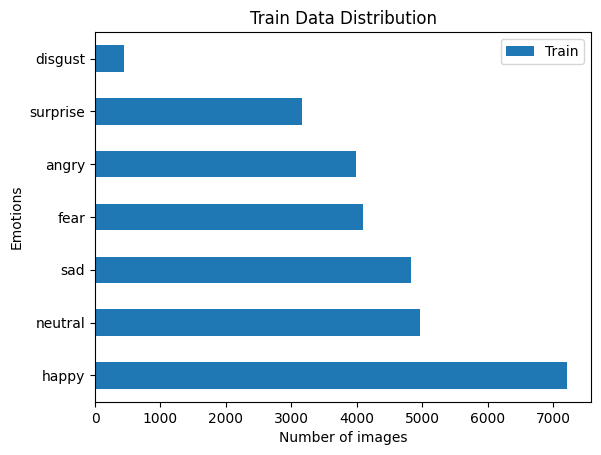

In [ ]:
Train_Count.plot(kind='barh')
plt.title('Train Data Distribution')
plt.xlabel('Number of images')
plt.ylabel('Emotions')
plt.show()

<Axes: >

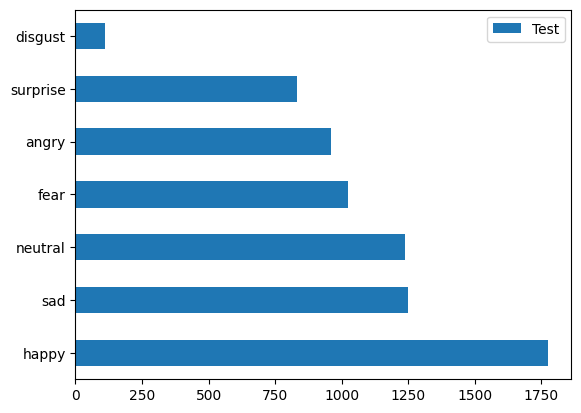

In [ ]:
Test_Count.plot(kind='barh')

# Unbalanced Data
Classification model favours the majority class due to its larger volume presence. Hence, accuracy of the model decreases.

# Possible Solutions
-  Resampling (Undersampling or Oversampling)
- SMOTE (Synthetic Minority Oversampling Technique)

In [ ]:
def getFaceImages(emotions, data_type, print_n=False):
    images = []
    labels = []
    path = "/content/gdrive/MyDrive/Fall2023/CS464 - ML/Project/dataset/" + data_type + "/"
    for i,f in enumerate(emotions):
        p = path + f
        j=0
        for image_path in glob.glob(os.path.join(p, "*.jpg")):
            image = cv2.imread(image_path, 0)
            image = cv2.resize(image, (img_size, img_size))
            images.append(image)
            labels.append(i)
            j+=1
        if(print_n):
            print("There are " , j , " " , data_type.upper(), " images of " , emotions[i].upper())
    images = np.array(images)
    labels = np.array(labels)
    return images, labels


In [ ]:
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

#Get Images and Labels
X, y =  getFaceImages(emotions, 'train', print_n=True)

# Splitting the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_test, y_test = getFaceImages(emotions, 'test', print_n=True)

There are  3995   TRAIN  images of  ANGRY
There are  436   TRAIN  images of  DISGUST
There are  4097   TRAIN  images of  FEAR
There are  7221   TRAIN  images of  HAPPY
There are  4965   TRAIN  images of  NEUTRAL
There are  4830   TRAIN  images of  SAD
There are  3171   TRAIN  images of  SURPRISE
There are  958   TEST  images of  ANGRY
There are  111   TEST  images of  DISGUST
There are  1024   TEST  images of  FEAR
There are  1774   TEST  images of  HAPPY
There are  1239   TEST  images of  NEUTRAL
There are  1247   TEST  images of  SAD
There are  831   TEST  images of  SURPRISE


In [ ]:
#Scale Data Images
scaler = StandardScaler()
X_train = scaler.fit_transform([i.flatten() for i in X_train])
X_val = scaler.fit_transform([i.flatten() for i in X_val])
X_test = scaler.fit_transform([i.flatten() for i in X_test])

In [ ]:
def plot_image_grid(images, nb_rows, nb_cols, figsize=(15, 15)):
    assert len(images) == nb_rows*nb_cols, "Number of images should be the same as (nb_rows*nb_cols)"
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=figsize)

    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].axis('off')
            axs[i, j].imshow(images[n])
            n += 1

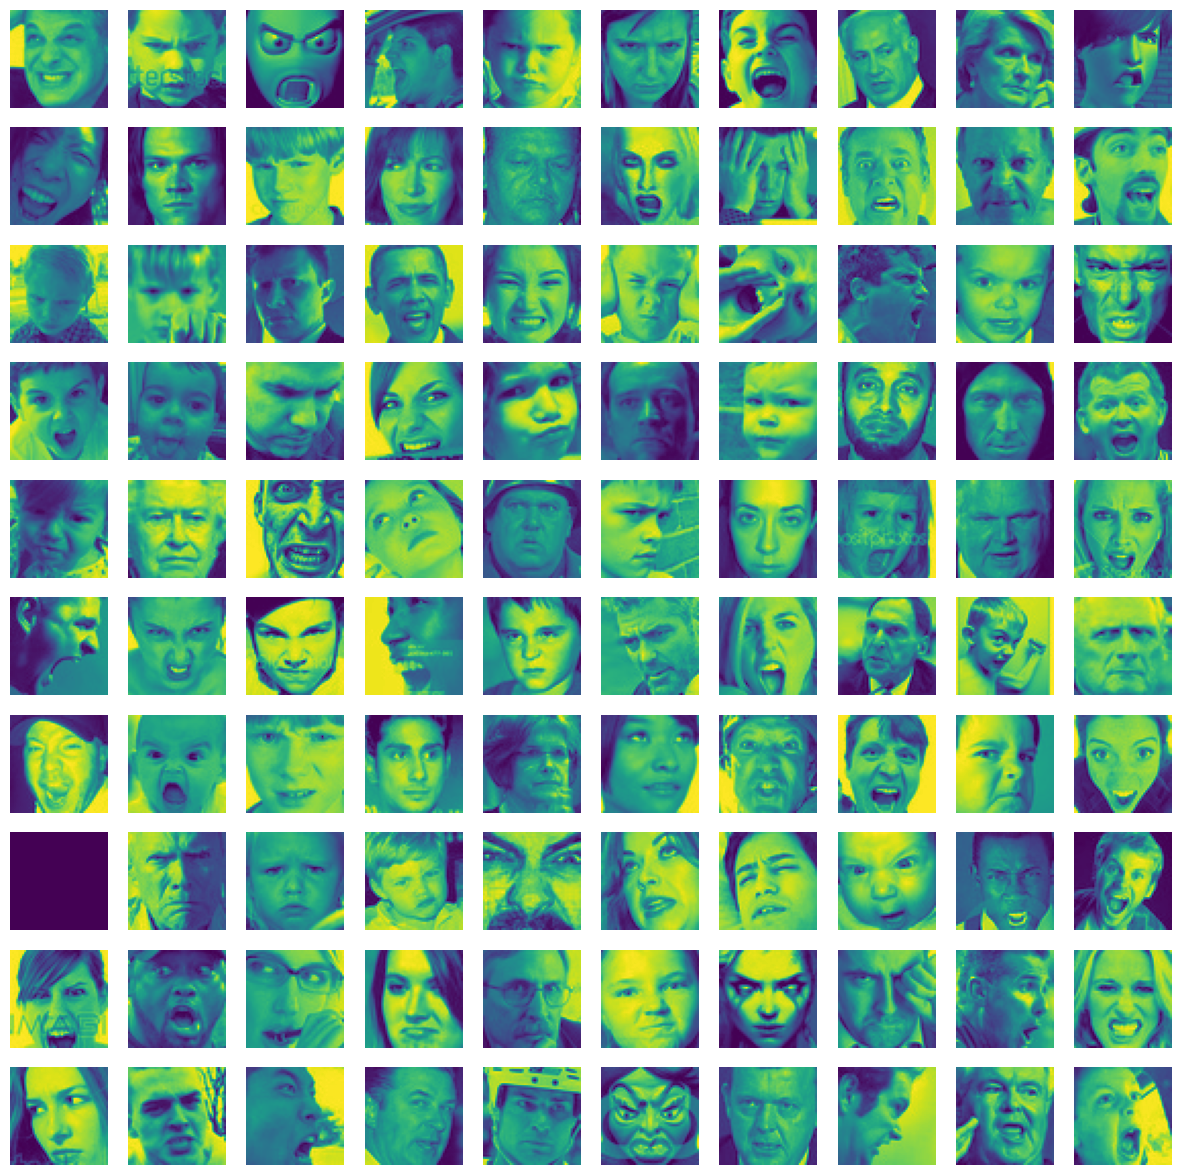

In [ ]:
plot_image_grid(X[0:100], 10, 10)

## PCA - Explained Variance Analysis

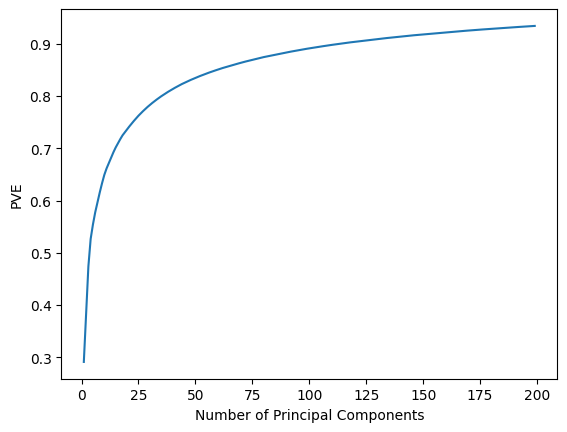

In [ ]:
number_of_components = [x for x in range(1,200)]
pve_list=[]
for component in number_of_components:
      pca = PCA(n_components=component)
      pca.fit(X_train)
      pve_list.append(np.sum(pca.explained_variance_ratio_))


plt.plot(number_of_components, pve_list)
plt.xlabel("Number of Principal Components")
plt.ylabel("PVE")
plt.show()

In [ ]:
pca100 = PCA(n_components=100)
X_train100 = pca100.fit_transform(X_train)
X_test100 = pca100.fit_transform(X_test)

pca200 = PCA(n_components=200)
X_train200 = pca200.fit_transform(X_train)
X_test200 = pca200.fit_transform(X_test)



In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
#Evaluation
precision = metrics.accuracy_score(y_pred, y_val) * 100
print("Accuracy with 2-NN: {0:.2f}%".format(precision))

Accuracy with K-NN: 33.80%


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
#Evaluation
precision = metrics.accuracy_score(y_pred, y_val) * 100
print("Accuracy with 5-NN: {0:.2f}%".format(precision))

Accuracy with K-NN: 33.17%


In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
#Evaluation
precision = metrics.accuracy_score(y_pred, y_val) * 100
print("Accuracy with 10-NN: {0:.2f}%".format(precision))

Accuracy with K-NN: 33.15%


In [ ]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
#Evaluation
precision = metrics.accuracy_score(y_pred, y_val) * 100
print("Accuracy with 15-NN: {0:.2f}%".format(precision))

Accuracy with K-NN: 32.49%


In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
#Evaluation
precision = metrics.accuracy_score(y_pred, y_test) * 100
print("Accuracy with 2-NN: {0:.2f}%".format(precision))
conf_matrix = metrics.confusion_matrix(y_pred, y_test)
print(conf_matrix)

Accuracy with 2-NN: 33.28%
[[356  22 204 301 188 268  90]
 [ 29  62  21  50  32  45  11]
 [156   5 394 243 236 230 144]
 [220   6 196 808 322 320 166]
 [143  13 145 292 389 245 121]
 [ 41   3  44  69  56 132  49]
 [ 13   0  20  11  16   7 250]]
